## Case Study

Submitted: Shrishti Vaish 2282425

You are a data scientist of a Analytics company Rinnegan Inc. You have been given a task to study the
data of 5000 youtubers (part-time, full-time) to understand their demographics and their earning
analysis. You will be given two datasets  
• Revenue Data  
• Calendar Data

Your task to do the following:  
• Clean the data  
• Answer the following questions:
> SQL based analysis
> > 1. Trends of number of quarterly contracts beginning and end date (tutor count and generated revenue)  
> > 2. Trend of contract value based on their start date and end date QoQ
> > 3. Trend of contract counts based on their start date and end date QoQ
> > 4. Number of customers whose revenue is greater than the average value in their respective departments.
> > 5. The share of revenue each region is generating w.r.t their department

> Python based analysis
> > Create two models
> > > 1. Regression – To predict the revenue which the tutor is capable of generating
> > > 2. Classification – To determine what is the geo of the tutor (cannot use region as independent variable)

> > For each model, provide the following details
> > > 1. Important variables for the model
> > > 2. How much is the variable contributing (Convert coeff to elasticity)
> > > 3. Elasticity is defined as the share of the coefficient of total sum of
coefficient
> > > 4. Model Health
> > > 5. Visualization (based on analysis)

The reviewer is not as much interested in the documentation, but in the coding skill. You will need to comment the code so that to clarify the purpose of the code.

#### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Loading Data

In [ ]:
cal_orig = pd.read_csv('/content/calendar_data.csv')
rindf_orig = pd.read_csv('/content/Rinnegan.csv')
cal_df = cal_orig.copy()
rin_df = rindf_orig.copy()

#### Data Wrangling

In [ ]:
print(rin_df.shape, cal_df.shape)

(5000, 10) (55152, 13)


In [ ]:
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55152 entries, 0 to 55151
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              55152 non-null  int64 
 1   Month             55152 non-null  int64 
 2   Day               55152 non-null  int64 
 3   Weekday           55152 non-null  object
 4   MonthStartDate    55152 non-null  object
 5   MonthEndDate      55152 non-null  object
 6   WeekEndDate       55152 non-null  object
 7   Quarter Name      55152 non-null  object
 8   Quarter           55152 non-null  int64 
 9   QuarterStartDate  55152 non-null  object
 10  QuarterEndDate    55152 non-null  object
 11  YearEndDate       55152 non-null  object
 12  cal_date          55152 non-null  object
dtypes: int64(4), object(9)
memory usage: 5.5+ MB


In [ ]:
rin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Start Date                        5000 non-null   object
 1   Geography                         5000 non-null   object
 2   Customer Number                   5000 non-null   object
 3   Social Media Advertisement        4908 non-null   object
 4   Customer Name                     5000 non-null   object
 5   Region                            5000 non-null   object
 6   End Date                          5000 non-null   object
 7   Average Number of Views Per Day   4936 non-null   object
 8   Average Number of Clicks per day  4950 non-null   object
 9   Revenue (in Million $)            4950 non-null   object
dtypes: object(10)
memory usage: 390.8+ KB


In [ ]:
cal_df.head()

,Year,Month,Day,Weekday,MonthStartDate,MonthEndDate,WeekEndDate,Quarter Name,Quarter,QuarterStartDate,QuarterEndDate,YearEndDate,cal_date
0,1900,1,1,Monday,01-01-1900,31-01-1900,04-02-1900,00Q1,1,01-01-1900,31-03-1900,31-12-1900,01-01-1900
1,1900,1,2,Tuesday,01-01-1900,31-01-1900,04-02-1900,00Q1,1,01-01-1900,31-03-1900,31-12-1900,02-01-1900
2,1900,1,3,Wednesday,01-01-1900,31-01-1900,04-02-1900,00Q1,1,01-01-1900,31-03-1900,31-12-1900,03-01-1900
3,1900,1,4,Thursday,01-01-1900,31-01-1900,04-02-1900,00Q1,1,01-01-1900,31-03-1900,31-12-1900,04-01-1900
4,1900,1,5,Friday,01-01-1900,31-01-1900,04-02-1900,00Q1,1,01-01-1900,31-03-1900,31-12-1900,05-01-1900


In [ ]:
rin_df.head()

,Start Date,Geography,Customer Number,Social Media Advertisement,Customer Name,Region,End Date,Average Number of Views Per Day,Average Number of Clicks per day,Revenue (in Million $)
0,28-12-2016,APAC,CUST-795047,38079.47177,Jack Hunter,East-Asia,16-07-2019,18312.98877,,92.27989555
1,23-07-2018,EMEA,CUST-750695,95120.71633,Elizabeth Rogers,Central-EMEA,10-10-2020,49297.3456,26966.90198,65.42832448
2,30-12-2025,EMEA,CUST-460002,73467.40024,Jacqueline Davis,North-EMEA,19-01-2028,-26019,19440.50841,126.5438621
3,24-01-2026,EMEA,CUST-462997,60267.18994,Joshua Pinkston,North-EMEA,18-07-2027,29397.63121,-26019,88.84953878
4,04-04-2021,APAC,CUST-800758,16445.8454,Jennifer Johnson,SE-Asia,23-06-2023,7227.609933,14790.92476,119.7063215


In [ ]:
rin_df.describe()

,Start Date,Geography,Customer Number,Social Media Advertisement,Customer Name,Region,End Date,Average Number of Views Per Day,Average Number of Clicks per day,Revenue (in Million $)
count,5000,5000,5000,4908,5000,5000,5000,4936,4950,4950
unique,2852,3,4984,4467,4963,11,3079,4601,4618,4678
top,21-09-2018,AMER,CUST-211278,,Jennifer Johnson,South-EMEA,08-01-2027,71712594,Not a lot,-26019
freq,7,1707,2,90,3,560,6,68,69,61


In [ ]:
cal_df.describe()

,Year,Month,Day,Quarter
count,55152.000000,55152.000000,55152.000000,55152.000000
mean,1975.000671,6.522991,15.729457,2.508576
std,43.588807,3.448718,8.800096,1.117086
min,1900.000000,1.000000,1.000000,1.000000
25%,1937.000000,4.000000,8.000000,2.000000
50%,1975.000000,7.000000,16.000000,3.000000
75%,2013.000000,10.000000,23.000000,4.000000
max,2050.000000,12.000000,31.000000,4.000000


We need to restructure the data in the following ways:
1. Changing data type of columns
> * The date columns should be in the datetime format and not object(string) format)
> * The revenue/ad/clicks columns should be in the float format and not object
2. Remove the Quartername column as we have Quarter column already
3. A few date columns are in different format than other
4. Customer Number and Customer Name Check

In [ ]:
cal_date_cols = ['MonthStartDate','MonthEndDate','WeekEndDate','QuarterStartDate','QuarterEndDate','YearEndDate','cal_date']
rin_date_cols = ['Start Date','End Date']

In [ ]:
# Convert the 'date' column from object to datetime type
for col in rin_date_cols:
    rin_df[col] = pd.to_datetime(rin_df[col])

for col in cal_date_cols:
    cal_df[col] = pd.to_datetime(cal_df[col])

<ipython-input-1374-0e74f4c1ba86>:3: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

<ipython-input-1374-0e74f4c1ba86>:3: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

<ipython-input-1374-0e74f4c1ba86>:6: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

<ipython-input-1374-0e74f4c1ba86>:6: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

<ipython-input-1374-0e74f4c1ba86>:6: UserWarning:

Parsing dates in DD/MM/YYYY forma

In [ ]:
rin_df['Social Media Advertisement'] = pd.to_numeric(rin_df['Social Media Advertisement'], errors='coerce')
rin_df['Average Number of Views Per Day'] = pd.to_numeric(rin_df['Average Number of Views Per Day'], errors='coerce')
rin_df['Average Number of Clicks per day'] = pd.to_numeric(rin_df['Average Number of Clicks per day'], errors='coerce')
rin_df['Revenue (in Million $)'] = pd.to_numeric(rin_df['Revenue (in Million $)'], errors='coerce')

In [ ]:
cal_df.drop('Quarter Name',axis=1,inplace=True)

In [ ]:
# Perform inner join on common columns with different names
merged_data = pd.merge(rin_df, cal_df, left_on='Start Date', right_on='cal_date', how='inner')
merged_data.head()

,Start Date,Geography,Customer Number,Social Media Advertisement,Customer Name,Region,End Date,Average Number of Views Per Day,Average Number of Clicks per day,Revenue (in Million $),...,Day,Weekday,MonthStartDate,MonthEndDate,WeekEndDate,Quarter,QuarterStartDate,QuarterEndDate,YearEndDate,cal_date
0,2016-12-28,APAC,CUST-795047,38079.47177,Jack Hunter,East-Asia,2019-07-16,18312.988770,NaN,92.279896,...,28,Wednesday,2016-01-12,2016-12-31,2017-01-01,4,2016-01-10,2016-12-31,2016-12-31,2016-12-28
1,2016-12-28,EMEA,CUST-360890,47951.24708,Carrie Castaneda,Central-EMEA,2019-05-17,30467.295990,11616.016570,106.850030,...,28,Wednesday,2016-01-12,2016-12-31,2017-01-01,4,2016-01-10,2016-12-31,2016-12-31,2016-12-28
2,2016-12-28,APAC,CUST-484305,48072.09581,William Pitt,Oceania,2018-08-20,24230.627040,14522.578620,86.288564,...,28,Wednesday,2016-01-12,2016-12-31,2017-01-01,4,2016-01-10,2016-12-31,2016-12-31,2016-12-28
3,2018-07-23,EMEA,CUST-750695,95120.71633,Elizabeth Rogers,Central-EMEA,2020-10-10,49297.345600,26966.901980,65.428324,...,23,Monday,2018-01-07,2018-07-31,2018-05-08,3,2018-01-07,2018-09-30,2018-12-31,2018-07-23
4,2018-07-23,AMER,CUST-973589,12762.97371,Barbara Painter,Caribbean,2019-01-19,4414.731231,-61.845727,132.000153,...,23,Monday,2018-01-07,2018-07-31,2018-05-08,3,2018-01-07,2018-09-30,2018-12-31,2018-07-23


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Start Date                        5000 non-null   datetime64[ns]
 1   Geography                         5000 non-null   object        
 2   Customer Number                   5000 non-null   object        
 3   Social Media Advertisement        4611 non-null   float64       
 4   Customer Name                     5000 non-null   object        
 5   Region                            5000 non-null   object        
 6   End Date                          5000 non-null   datetime64[ns]
 7   Average Number of Views Per Day   4719 non-null   float64       
 8   Average Number of Clicks per day  4714 non-null   float64       
 9   Revenue (in Million $)            4783 non-null   float64       
 10  Year                              5000 non-null 

In [ ]:
merged_df_duplicate_rows = merged_data[merged_data.duplicated()]
merged_df_duplicate_rows

,Start Date,Geography,Customer Number,Social Media Advertisement,Customer Name,Region,End Date,Average Number of Views Per Day,Average Number of Clicks per day,Revenue (in Million $),...,Day,Weekday,MonthStartDate,MonthEndDate,WeekEndDate,Quarter,QuarterStartDate,QuarterEndDate,YearEndDate,cal_date


In [ ]:
merged_data.isnull().sum()

Start Date                            0
Geography                             0
Customer Number                       0
Social Media Advertisement          389
Customer Name                         0
Region                                0
End Date                              0
Average Number of Views Per Day     281
Average Number of Clicks per day    286
Revenue (in Million $)              217
Year                                  0
Month                                 0
Day                                   0
Weekday                               0
MonthStartDate                        0
MonthEndDate                          0
WeekEndDate                           0
Quarter                               0
QuarterStartDate                      0
QuarterEndDate                        0
YearEndDate                           0
cal_date                              0
dtype: int64

In [ ]:
for col in merged_data.columns:
  print(col, len(merged_data[col]), merged_data[col].isnull().sum(),(merged_data[col].isnull().sum()/5000)*100 )

Start Date 5000 0 0.0
Geography 5000 0 0.0
Customer Number 5000 0 0.0
Social Media Advertisement 5000 389 7.779999999999999
Customer Name 5000 0 0.0
Region 5000 0 0.0
End Date 5000 0 0.0
Average Number of Views Per Day 5000 281 5.62
Average Number of Clicks per day 5000 286 5.72
Revenue (in Million $) 5000 217 4.34
Year 5000 0 0.0
Month 5000 0 0.0
Day 5000 0 0.0
Weekday 5000 0 0.0
MonthStartDate 5000 0 0.0
MonthEndDate 5000 0 0.0
WeekEndDate 5000 0 0.0
Quarter 5000 0 0.0
QuarterStartDate 5000 0 0.0
QuarterEndDate 5000 0 0.0
YearEndDate 5000 0 0.0
cal_date 5000 0 0.0


In [ ]:
merged_data.describe().apply(lambda s: s.apply('{0:.5f}'.format))  #lambda function to round values upto 5 decimal places

,Social Media Advertisement,Average Number of Views Per Day,Average Number of Clicks per day,Revenue (in Million $),Year,Month,Day,Quarter
count,4611.00000,4719.00000,4714.00000,4783.00000,5000.00000,5000.00000,5000.00000,5000.00000
mean,1058851.28326,1057451.65902,805609.05774,749426.61666,2021.04220,6.44620,15.88460,2.47820
std,8449421.47322,8544208.45959,7489468.63490,7294494.16417,3.16234,3.47930,8.86813,1.12436
min,-26019.00000,-26019.00000,-26019.00000,-26019.00000,2016.00000,1.00000,1.00000,1.00000
25%,24051.54727,12248.26021,7423.74810,85.30615,2018.00000,3.00000,8.00000,1.00000
50%,49947.61017,25266.34590,15197.57684,99.58245,2021.00000,6.00000,16.00000,2.00000
75%,75354.78830,37816.23899,22967.15844,113.22899,2024.00000,9.00000,24.00000,3.00000
max,71712594.00000,71712594.00000,71712594.00000,71712594.00000,2026.00000,12.00000,31.00000,4.00000


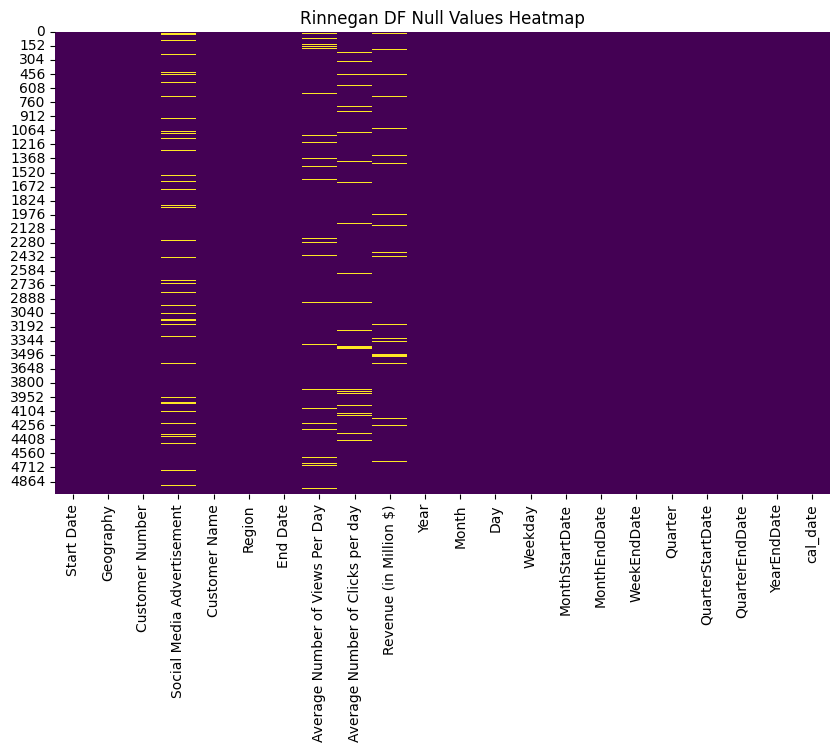

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(merged_data.isnull(), cmap='viridis', cbar=False)
plt.title('Rinnegan DF Null Values Heatmap')
plt.show()

In [ ]:
# Identify rows where multiple columns have missing values
rows_with_missing = merged_data[merged_data.isnull().sum(axis=1) > 1]

# List the columns with missing values for each row
missing_columns_per_row = rows_with_missing.apply(lambda row: row.index[row.isnull()].tolist(), axis=1)

# Display rows and corresponding missing columns
for idx, missing_columns in missing_columns_per_row.items():
    print(f"Row {idx}: Missing columns - {', '.join(missing_columns)}")

Row 15: Missing columns - Social Media Advertisement, Average Number of Views Per Day, Revenue (in Million $)
Row 115: Missing columns - Social Media Advertisement, Average Number of Clicks per day
Row 130: Missing columns - Social Media Advertisement, Average Number of Clicks per day
Row 312: Missing columns - Average Number of Clicks per day, Revenue (in Million $)
Row 415: Missing columns - Social Media Advertisement, Revenue (in Million $)
Row 452: Missing columns - Social Media Advertisement, Average Number of Clicks per day
Row 459: Missing columns - Social Media Advertisement, Average Number of Clicks per day, Revenue (in Million $)
Row 472: Missing columns - Social Media Advertisement, Average Number of Views Per Day
Row 536: Missing columns - Average Number of Clicks per day, Revenue (in Million $)
Row 594: Missing columns - Social Media Advertisement, Average Number of Views Per Day
Row 697: Missing columns - Social Media Advertisement, Revenue (in Million $)
Row 712: Missing

In [ ]:
rows_with_missing.corr()

<ipython-input-1385-b3c119970d22>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Social Media Advertisement,Average Number of Views Per Day,Average Number of Clicks per day,Revenue (in Million $),Year,Month,Day,Quarter
Social Media Advertisement,1.000000,0.958234,-0.177662,-0.228593,0.088068,0.034551,-0.081605,0.089539
Average Number of Views Per Day,0.958234,1.000000,0.198819,-0.203649,0.133325,-0.122833,-0.133438,-0.174549
Average Number of Clicks per day,-0.177662,0.198819,1.000000,-0.482587,-0.015939,0.037524,0.019287,0.091584
Revenue (in Million $),-0.228593,-0.203649,-0.482587,1.000000,0.251515,0.093211,-0.223300,0.042809
Year,0.088068,0.133325,-0.015939,0.251515,1.000000,-0.108066,0.004855,-0.065315
Month,0.034551,-0.122833,0.037524,0.093211,-0.108066,1.000000,-0.041574,0.966727
Day,-0.081605,-0.133438,0.019287,-0.223300,0.004855,-0.041574,1.000000,-0.058710
Quarter,0.089539,-0.174549,0.091584,0.042809,-0.065315,0.966727,-0.058710,1.000000


_Social Media Advertisement_ and _Average Number of Views Per Day_ are highly correlated positively, so we can drop any one of these columns: _Social Media Advertisement_

In [ ]:
merged_data.drop('Social Media Advertisement',axis=1,inplace=True)

Now, as we see that the maximam value for all the 4 float features is same, I need to investigate further:

In [ ]:
max_row_index = merged_data['Average Number of Views Per Day'].idxmax()

# Print the entire row with the maximum value
max_row = merged_data.loc[max_row_index]
print("Row with maximum value:")
print(max_row)

Row with maximum value:
Start Date                          2017-02-24 00:00:00
Geography                                          EMEA
Customer Number                             CUST-205030
Customer Name                                 Diana May
Region                                       South-EMEA
End Date                            2021-03-02 00:00:00
Average Number of Views Per Day              71712594.0
Average Number of Clicks per day            25623.57336
Revenue (in Million $)                       128.153323
Year                                               2017
Month                                                 2
Day                                                  24
Weekday                                          Friday
MonthStartDate                      2017-01-02 00:00:00
MonthEndDate                        2017-02-28 00:00:00
WeekEndDate                         2017-05-03 00:00:00
Quarter                                               1
QuarterStartDate        

The numbers you've provided, an average of 71,712,594 views per day and an average of 2,827.016167 clicks per day, might be plausible

In [ ]:
max_row_index = merged_data['Average Number of Clicks per day'].idxmax()

# Print the entire row with the maximum value
max_row = merged_data.loc[max_row_index]
print("Row with maximum value:")
max_row

Row with maximum value:


Start Date                          2026-01-24 00:00:00
Geography                                          AMER
Customer Number                             CUST-173118
Customer Name                          Raymond Morrison
Region                                        Caribbean
End Date                            2028-12-06 00:00:00
Average Number of Views Per Day              989.685743
Average Number of Clicks per day             71712594.0
Revenue (in Million $)                        78.711743
Year                                               2026
Month                                                 1
Day                                                  24
Weekday                                        Saturday
MonthStartDate                      2026-01-01 00:00:00
MonthEndDate                        2026-01-31 00:00:00
WeekEndDate                         2026-01-02 00:00:00
Quarter                                               1
QuarterStartDate                    2026-01-01 0

An average of 4218.411701 views per day and an average of 71712594.0 clicks per day, do raise some concerns due to the significant difference in scale between the two averages. Let's examine the context and feasibility of these numbers:

_Average Number of Views Per Day (4218.411701):_
An average of around 4,218 views per day is relatively low for online platforms with a broad user base. Smaller websites, niche platforms, or platforms with limited content might have such lower averages. If analysis involves a platform with a small user base or a specific focus, this number could be plausible.

_Average Number of Clicks Per Day (71712594.0):_
An average of over 71 million clicks per day is remarkably high and might raise suspicions. Such a high average could indicate data anomalies, incorrect data collection, or an issue with data interpretation.

In [ ]:
#All the youtubers with exceptionally high number of clicks per day
merged_data[merged_data['Average Number of Clicks per day'] == np.max(merged_data['Average Number of Clicks per day'])]

,Start Date,Geography,Customer Number,Customer Name,Region,End Date,Average Number of Views Per Day,Average Number of Clicks per day,Revenue (in Million $),Year,...,Day,Weekday,MonthStartDate,MonthEndDate,WeekEndDate,Quarter,QuarterStartDate,QuarterEndDate,YearEndDate,cal_date
10,2026-01-24,AMER,CUST-173118,Raymond Morrison,Caribbean,2028-12-06,9.896857e+02,71712594.0,78.711743,2026,...,24,Saturday,2026-01-01,2026-01-31,2026-01-02,1,2026-01-01,2026-03-31,2026-12-31,2026-01-24
87,2021-06-05,APAC,CUST-659280,Sammy Purvis,ANZ,2023-03-27,4.218412e+03,71712594.0,76.613403,2021,...,6,Thursday,2021-01-05,2021-05-31,2021-06-06,2,2021-01-04,2021-06-30,2021-12-31,2021-06-05
110,2017-07-19,EMEA,CUST-415395,Bruce Radcliffe,South-EMEA,2021-11-25,1.661320e+04,71712594.0,104.425809,2017,...,19,Wednesday,2017-01-07,2017-07-31,2017-06-08,3,2017-01-07,2017-09-30,2017-12-31,2017-07-19
111,2022-11-04,EMEA,CUST-908065,Timothy Feathers,Central-EMEA,2026-06-19,NaN,71712594.0,78.394264,2022,...,11,Monday,2022-01-04,2022-04-30,2022-01-05,2,2022-01-04,2022-06-30,2022-12-31,2022-11-04
195,2019-01-01,APAC,CUST-538036,Mel Villanueva,ANZ,2019-10-28,7.119484e+03,71712594.0,126.730961,2019,...,1,Tuesday,2019-01-01,2019-01-31,2019-03-02,1,2019-01-01,2019-03-31,2019-12-31,2019-01-01
251,2025-02-09,EMEA,CUST-405031,Ellen Veilleux,Central-EMEA,2028-05-19,-2.601900e+04,71712594.0,76.085506,2025,...,2,Tuesday,2025-01-09,2025-09-30,2025-05-10,3,2025-01-07,2025-09-30,2025-12-31,2025-02-09
288,2024-01-06,EMEA,CUST-244568,Harold Tatum,South-EMEA,2029-06-01,2.951799e+04,71712594.0,81.909928,2024,...,1,Saturday,2024-01-06,2024-06-30,2024-06-30,2,2024-01-04,2024-06-30,2024-12-31,2024-01-06
410,2025-05-20,AMER,CUST-625031,April Campbell,Caribbean,2027-06-12,5.144792e+04,71712594.0,89.641484,2025,...,20,Tuesday,2025-01-05,2025-05-31,2025-01-06,2,2025-01-04,2025-06-30,2025-12-31,2025-05-20
472,2021-07-16,EMEA,CUST-791866,Jennifer Milar,South-EMEA,2026-06-20,NaN,71712594.0,71.930243,2021,...,16,Friday,2021-01-07,2021-07-31,2021-01-08,3,2021-01-07,2021-09-30,2021-12-31,2021-07-16
550,2018-02-12,AMER,CUST-886968,Joseph Grobmyer,Caribbean,2019-12-27,3.197514e+04,71712594.0,71.233909,2018,...,2,Sunday,2018-01-12,2018-12-31,2019-06-01,4,2018-01-10,2018-12-31,2018-12-31,2018-02-12


In [ ]:
#All the youtubers with exceptionally high number of Views per day
merged_data[merged_data['Average Number of Views Per Day'] == np.max(merged_data['Average Number of Views Per Day'])]

,Start Date,Geography,Customer Number,Customer Name,Region,End Date,Average Number of Views Per Day,Average Number of Clicks per day,Revenue (in Million $),Year,...,Day,Weekday,MonthStartDate,MonthEndDate,WeekEndDate,Quarter,QuarterStartDate,QuarterEndDate,YearEndDate,cal_date
105,2017-02-24,EMEA,CUST-205030,Diana May,South-EMEA,2021-03-02,71712594.0,25623.573360,128.153323,2017,...,24,Friday,2017-01-02,2017-02-28,2017-05-03,1,2017-01-01,2017-03-31,2017-12-31,2017-02-24
242,2023-05-22,APAC,CUST-393497,Kenneth Dungee,East-Asia,2028-01-26,71712594.0,11024.767340,105.383996,2023,...,22,Monday,2023-01-05,2023-05-31,2023-04-06,2,2023-01-04,2023-06-30,2023-12-31,2023-05-22
243,2023-05-22,APAC,CUST-792825,Dorothy Snyder,Oceania,2024-12-11,71712594.0,18386.736830,96.942178,2023,...,22,Monday,2023-01-05,2023-05-31,2023-04-06,2,2023-01-04,2023-06-30,2023-12-31,2023-05-22
264,2020-08-10,EMEA,CUST-381101,Ryan Brady,Central-EMEA,2023-08-24,71712594.0,2827.016167,126.280952,2020,...,8,Thursday,2020-01-10,2020-10-31,2020-01-11,4,2020-01-10,2020-12-31,2020-12-31,2020-08-10
271,2021-05-18,APAC,CUST-697771,Felicia Bufford,East-Asia,2024-12-28,71712594.0,24679.643140,94.556407,2021,...,18,Tuesday,2021-01-05,2021-05-31,2021-06-06,2,2021-01-04,2021-06-30,2021-12-31,2021-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,2021-05-08,EMEA,CUST-404622,Jay Johnson,South-EMEA,2022-01-07,71712594.0,25328.545800,81.583548,2021,...,5,Thursday,2021-01-08,2021-08-31,2021-05-09,3,2021-01-07,2021-09-30,2021-12-31,2021-05-08
4599,2016-01-24,AMER,CUST-400169,Clarence Higa,Central America,2019-07-07,71712594.0,4992.679123,87.986252,2016,...,24,Sunday,2016-01-01,2016-01-31,2016-01-31,1,2016-01-01,2016-03-31,2016-12-31,2016-01-24
4611,2017-09-02,EMEA,CUST-904060,David Burnett,North-EMEA,2019-03-31,71712594.0,17564.310790,98.010479,2017,...,9,Thursday,2017-01-02,2017-02-28,2017-05-03,1,2017-01-01,2017-03-31,2017-12-31,2017-09-02
4733,2023-03-21,AMER,CUST-589490,John Fried,Caribbean,2026-12-30,71712594.0,5626.282927,92.722537,2023,...,21,Tuesday,2023-01-03,2023-03-31,2023-02-04,1,2023-01-01,2023-03-31,2023-12-31,2023-03-21


In [ ]:
#All the youtubers with exceptionally high revenue per day
merged_data[merged_data['Revenue (in Million $)'] == np.max(merged_data['Revenue (in Million $)'])]

,Start Date,Geography,Customer Number,Customer Name,Region,End Date,Average Number of Views Per Day,Average Number of Clicks per day,Revenue (in Million $),Year,...,Day,Weekday,MonthStartDate,MonthEndDate,WeekEndDate,Quarter,QuarterStartDate,QuarterEndDate,YearEndDate,cal_date
85,2023-12-21,APAC,CUST-239198,Jerry Reed,East-Asia,2026-08-07,18706.304540,8401.194382,71712594.0,2023,...,21,Thursday,2023-01-12,2023-12-31,2023-12-31,4,2023-01-10,2023-12-31,2023-12-31,2023-12-21
172,2023-03-12,EMEA,CUST-672000,Betty Berry,North-EMEA,2024-06-30,17324.244930,10168.632460,71712594.0,2023,...,3,Sunday,2023-01-12,2023-12-31,2023-12-31,4,2023-01-10,2023-12-31,2023-12-31,2023-03-12
327,2021-02-05,APAC,CUST-364019,Cara Aaberg,ANZ,2025-12-03,45691.920780,28079.145870,71712594.0,2021,...,2,Sunday,2021-01-05,2021-05-31,2021-06-06,2,2021-01-04,2021-06-30,2021-12-31,2021-02-05
450,2024-10-19,EMEA,CUST-620923,Violet Uren,South-EMEA,2026-11-02,16901.642180,15133.518010,71712594.0,2024,...,19,Saturday,2024-01-10,2024-10-31,2024-03-11,4,2024-01-10,2024-12-31,2024-12-31,2024-10-19
476,2019-07-21,EMEA,CUST-630053,Gladys Mauk,South-EMEA,2022-06-04,27133.653220,12012.552460,71712594.0,2019,...,21,Sunday,2019-01-07,2019-07-31,2019-04-08,3,2019-01-07,2019-09-30,2019-12-31,2019-07-21
488,2023-12-13,AMER,CUST-623127,Betty Huse,South America,2026-02-03,9620.971068,4333.820307,71712594.0,2023,...,13,Wednesday,2023-01-12,2023-12-31,2023-12-31,4,2023-01-10,2023-12-31,2023-12-31,2023-12-13
547,2019-09-18,AMER,CUST-491884,Yolanda Gunter,South America,2021-08-08,9265.104526,3819.562461,71712594.0,2019,...,18,Wednesday,2019-01-09,2019-09-30,2019-06-10,3,2019-01-07,2019-09-30,2019-12-31,2019-09-18
579,2023-03-19,APAC,CUST-766290,Kathleen Chance,ANZ,2024-01-13,43822.838610,NaN,71712594.0,2023,...,19,Sunday,2023-01-03,2023-03-31,2023-02-04,1,2023-01-01,2023-03-31,2023-12-31,2023-03-19
884,2026-06-13,AMER,CUST-690966,Theodore Garza,Caribbean,2030-12-19,22811.677250,15030.420120,71712594.0,2026,...,13,Saturday,2026-01-06,2026-06-30,2026-05-07,2,2026-01-04,2026-06-30,2026-12-31,2026-06-13
886,2016-11-05,APAC,CUST-529253,Dolores Caron,SE-Asia,2018-02-03,-622.860561,-1465.611590,71712594.0,2016,...,11,Wednesday,2016-01-05,2016-05-31,2016-05-06,2,2016-01-04,2016-06-30,2016-12-31,2016-11-05


In [ ]:
# Calculate the median of the column
median_value = merged_data['Average Number of Views Per Day'].median()

# Find rows with maximum values in the specified column
max_rows = merged_data[merged_data['Average Number of Views Per Day'] == merged_data['Average Number of Views Per Day'].max()]

# Replace maximum values with the calculated median value
merged_data.loc[max_rows.index, 'Average Number of Views Per Day'] = median_value


In [ ]:
# Calculate the median of the column
median_value = merged_data['Average Number of Clicks per day'].median()

# Find rows with maximum values in the specified column
max_rows = merged_data[merged_data['Average Number of Clicks per day'] == merged_data['Average Number of Clicks per day'].max()]

# Replace maximum values with the calculated median value
merged_data.loc[max_rows.index, 'Average Number of Clicks per day'] = median_value


In [ ]:
# Calculate the median of the column
median_value = merged_data['Revenue (in Million $)'].median()

# Find rows with maximum values in the specified column
max_rows = merged_data[merged_data['Revenue (in Million $)'] == merged_data['Revenue (in Million $)'].max()]

# Replace maximum values with the calculated median value
merged_data.loc[max_rows.index, 'Revenue (in Million $)'] = median_value


In [ ]:
columns_to_replace = ['Average Number of Views Per Day', 'Average Number of Clicks per day', 'Revenue (in Million $)']  # Replace with your actual column names

# Replace NaN values with the median of each column
for column in columns_to_replace:
    median_value = merged_data[column].median()
    merged_data[column].fillna(median_value, inplace=True)

In [ ]:
merged_data.isnull().sum()

Start Date                          0
Geography                           0
Customer Number                     0
Customer Name                       0
Region                              0
End Date                            0
Average Number of Views Per Day     0
Average Number of Clicks per day    0
Revenue (in Million $)              0
Year                                0
Month                               0
Day                                 0
Weekday                             0
MonthStartDate                      0
MonthEndDate                        0
WeekEndDate                         0
Quarter                             0
QuarterStartDate                    0
QuarterEndDate                      0
YearEndDate                         0
cal_date                            0
dtype: int64

In [ ]:
# Get unique values from column1
unique_values_custNum = merged_data['Customer Number'].unique()

# Check for each unique value in column1
for value_to_check in unique_values_custNum:
    mask = merged_data['Customer Number'] == value_to_check
    if merged_data[mask]['Customer Name'].duplicated().any():
        print(f"Multiple values in {'Customer Name'} for {value_to_check} in {'Customer Number'}")

*We found that every customer id is different and that no single customer Number has 2 different Customer Names so I'll remove Customer Name column too!*

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Start Date                        5000 non-null   datetime64[ns]
 1   Geography                         5000 non-null   object        
 2   Customer Number                   5000 non-null   object        
 3   Customer Name                     5000 non-null   object        
 4   Region                            5000 non-null   object        
 5   End Date                          5000 non-null   datetime64[ns]
 6   Average Number of Views Per Day   5000 non-null   float64       
 7   Average Number of Clicks per day  5000 non-null   float64       
 8   Revenue (in Million $)            5000 non-null   float64       
 9   Year                              5000 non-null   int64         
 10  Month                             5000 non-null 

In [ ]:
# Calculate the duration in days
merged_data['DurationDays'] = (merged_data['End Date'] - merged_data['Start Date']).dt.days

In [ ]:
merged_data.drop(['Start Date','End Date','MonthStartDate','MonthEndDate','QuarterStartDate','QuarterEndDate','Customer Name','cal_date','WeekEndDate','YearEndDate'],axis=1,inplace=True)
merged_data.to_csv('cleaned_data.csv')

#### Log Transformation

In [ ]:
# Apply log transformation to the selected columns
merged_data[columns_to_replace] = np.log(merged_data[columns_to_replace])

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning:

invalid value encountered in log



In [ ]:
merged_data.head()

,Geography,Customer Number,Region,Average Number of Views Per Day,Average Number of Clicks per day,Revenue (in Million $),Year,Month,Day,Weekday,Quarter,DurationDays
0,APAC,CUST-795047,East-Asia,9.815366,9.628789,4.524826,2016,12,28,Wednesday,4,930
1,EMEA,CUST-360890,Central-EMEA,10.324409,9.360140,4.671426,2016,12,28,Wednesday,4,870
2,APAC,CUST-484305,Oceania,10.095373,9.583460,4.457697,2016,12,28,Wednesday,4,600
3,EMEA,CUST-750695,Central-EMEA,10.805626,10.202366,4.180955,2018,7,23,Monday,3,810
4,AMER,CUST-973589,Caribbean,8.392702,NaN,4.882803,2018,7,23,Monday,3,180


### Univariate Analysis

In [ ]:
num_df = merged_data.select_dtypes(exclude=['object','datetime']).columns

In [ ]:
#import plotly.graph_objects as go
#import plotly.subplots as sp
import plotly.express as px

#### Numerical Features

In [ ]:
#df = px.data.tips()
for col in num_df:
  fig = px.histogram(merged_data, x=col,
                   marginal="box", # or violin, rug
                   hover_data=num_df)
  fig.show()

#### Categorical Features

In [ ]:
cat_df = merged_data.select_dtypes(include='object').columns

In [ ]:
for col in cat_df:
  fig = px.histogram(merged_data, x=col)
  #fig.update_layout(bargap=0.2)
  fig.show()

#### Date Features

In [ ]:
dt_df = merged_data.select_dtypes(include='datetime').columns

In [ ]:
for col in dt_df:
  fig = px.histogram(merged_data, x=col)
  fig.update_layout(bargap=0.2)
  fig.show()

### Bivariate Analysis

##### Numerical

In [ ]:
for col in num_df:
  fig = px.scatter(merged_data,x=col, y=merged_data['Revenue (in Million $)'])
  fig.show()

##### Categorical

In [ ]:
for col in cat_df:
  fig = px.bar(merged_data, x=col, y=rin_df['Revenue (in Million $)'])
  fig.show()

##### Time-Series

In [ ]:
dt_df = merged_data.select_dtypes(include='datetime')
dt_df['Revenue'] = merged_data['Revenue (in Million $)']
dt_df.head()

,Revenue
0,4.524826
1,4.671426
2,4.457697
3,4.180955
4,4.882803


In [ ]:
# Melt the DataFrame to create a long-form representation

melted_data = pd.melt(dt_df, id_vars=['Revenue'], value_vars=dt_df.columns,
                      var_name='date_column', value_name='date')

# Convert 'date' column to datetime format
melted_data['date'] = pd.to_datetime(melted_data['date'])


# Group the melted data by date and sum the revenue values
grouped_data = melted_data.groupby(['date','date_column'])['Revenue'].sum().reset_index()
grouped_data

,date,date_column,Revenue


In [ ]:
# Create the line plot using Plotly Express
fig = px.line(grouped_data, x='date', y='Revenue', color='date_column', title='Grouped Line Plot by Date')

# Show the figure
fig.show()

## Regression

### Encoding

In [ ]:
#!pip install --upgrade category_encoders

In [ ]:
### Target Encoding - Customer Number
#import category_encoders as ce

In [ ]:
#Create target encoding object
#encoder=ce.TargetEncoder(cols='Customer Number')

In [ ]:
#Fit and Transform Train Data
#en1 = encoder.fit_transform(merged_data['Customer Number'],merged_data['Revenue (in Million $)'])
#en1

In [ ]:
#merged_data['Customer Number'] = en1

In [ ]:
merged_data.head()

,Geography,Customer Number,Region,Average Number of Views Per Day,Average Number of Clicks per day,Revenue (in Million $),Year,Month,Day,Weekday,Quarter,DurationDays
0,APAC,CUST-795047,East-Asia,9.815366,9.628789,4.524826,2016,12,28,Wednesday,4,930
1,EMEA,CUST-360890,Central-EMEA,10.324409,9.360140,4.671426,2016,12,28,Wednesday,4,870
2,APAC,CUST-484305,Oceania,10.095373,9.583460,4.457697,2016,12,28,Wednesday,4,600
3,EMEA,CUST-750695,Central-EMEA,10.805626,10.202366,4.180955,2018,7,23,Monday,3,810
4,AMER,CUST-973589,Caribbean,8.392702,NaN,4.882803,2018,7,23,Monday,3,180


### One-hot encode

In [ ]:
# Specify the categorical columns to one-hot encode
categorical_columns = ['Geography', 'Region', 'Weekday']

# Apply one-hot encoding to the specified columns
encoded_data = pd.get_dummies(merged_data, columns=categorical_columns)

# Print the DataFrame with encoded column
encoded_data

,Customer Number,Average Number of Views Per Day,Average Number of Clicks per day,Revenue (in Million $),Year,Month,Day,Quarter,DurationDays,Geography_AMER,...,Region_SE-Asia,Region_South America,Region_South-EMEA,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,CUST-795047,9.815366,9.628789,4.524826,2016,12,28,4,930,0,...,0,0,0,0,0,0,0,0,0,1
1,CUST-360890,10.324409,9.360140,4.671426,2016,12,28,4,870,0,...,0,0,0,0,0,0,0,0,0,1
2,CUST-484305,10.095373,9.583460,4.457697,2016,12,28,4,600,0,...,0,0,0,0,0,0,0,0,0,1
3,CUST-750695,10.805626,10.202366,4.180955,2018,7,23,3,810,0,...,0,0,0,0,1,0,0,0,0,0
4,CUST-973589,8.392702,NaN,4.882803,2018,7,23,3,180,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,CUST-361753,10.297191,10.052036,4.440467,2022,11,26,4,1379,0,...,0,0,0,0,0,1,0,0,0,0
4996,CUST-123691,9.822843,9.138343,4.251215,2023,7,5,3,1409,0,...,0,0,0,0,0,0,0,0,0,1
4997,CUST-271487,10.328953,9.906600,4.454675,2021,7,15,3,656,1,...,0,0,0,0,0,0,0,1,0,0
4998,CUST-151760,9.429554,8.950306,4.669931,2021,12,29,4,1322,1,...,0,0,0,0,0,0,0,0,0,1


### Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
mod_data = encoded_data.copy()
mod_data.drop('Customer Number',axis=1,inplace=True)
mod_data.dropna(inplace=True)
mod_data.head()

,Average Number of Views Per Day,Average Number of Clicks per day,Revenue (in Million $),Year,Month,Day,Quarter,DurationDays,Geography_AMER,Geography_APAC,...,Region_SE-Asia,Region_South America,Region_South-EMEA,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,9.815366,9.628789,4.524826,2016,12,28,4,930,0,1,...,0,0,0,0,0,0,0,0,0,1
1,10.324409,9.360140,4.671426,2016,12,28,4,870,0,0,...,0,0,0,0,0,0,0,0,0,1
2,10.095373,9.583460,4.457697,2016,12,28,4,600,0,1,...,0,0,0,0,0,0,0,0,0,1
3,10.805626,10.202366,4.180955,2018,7,23,3,810,0,0,...,0,0,0,0,1,0,0,0,0,0
6,10.620221,9.924915,4.297609,2025,12,30,4,1352,0,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y = mod_data['Revenue (in Million $)']
X = mod_data.drop(['Revenue (in Million $)'], axis=1)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape)

(3861, 28) (682, 28)


#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the model on the training data
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn_model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
formatted_mse = "{:.10f}".format(mse)
print("Mean Squared Error:", formatted_mse)

Mean Squared Error: 0.0472867451


##### Elasticity : No coefficients as I used Non-paramentric Method

##### Important Variables

Average Number of Views Per Day: 0.0053426630773446785
Average Number of Clicks per day: 0.011689277423079947
Year: -0.010534840466900652
Month: -0.024073680393290386
Day: 0.03444926364444938
Quarter: 0.004121509955180391
DurationDays: 0.018113024524504917
Geography_AMER: 0.0022898047725793623
Geography_APAC: 0.00043610069300936694
Geography_EMEA: 0.0015297903978379601
Region_ANZ: -0.0006207957523342245
Region_Caribbean: 0.0008195007941454336
Region_Central America: -0.00120909843863366
Region_Central-EMEA: -3.6826831796510363e-06
Region_East-Asia: 0.0008652638605958441
Region_North America: 1.7200227728286777e-05
Region_North-EMEA: 0.0011710389489878014
Region_Oceania: -0.0015664359985283483
Region_SE-Asia: -0.002317806104334341
Region_South America: 0.0014719496694688416
Region_South-EMEA: -3.053809708872812e-05
Weekday_Friday: 0.00019709446645226335
Weekday_Monday: 0.0019376321988645805
Weekday_Saturday: -0.0005053786906369151
Weekday_Sunday: -0.00019120892651107723
Weekday_Thursday

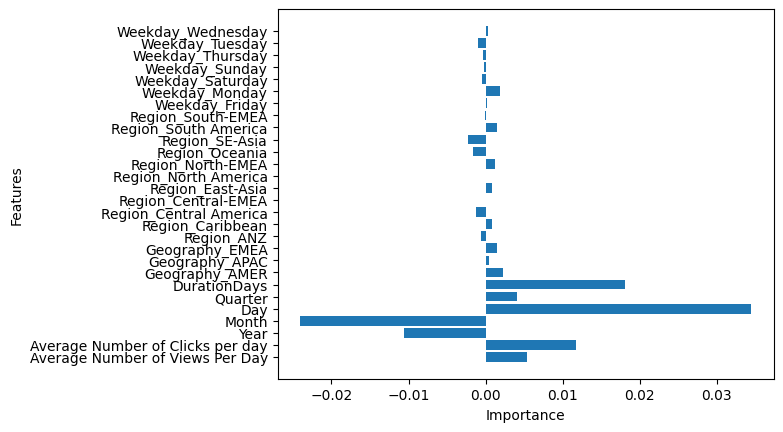

In [ ]:
# Feature Importance using Permutation Feature Importance
features = mod_data.drop('Revenue (in Million $)',axis=1).columns

from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(knn_model, X_test, y_test)

# Print feature importances
for i, feature in enumerate(features):
    print(f"{feature}: {perm_importance.importances_mean[i]}")

# Visualization
plt.barh(features, perm_importance.importances_mean)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## Classification

In [ ]:
# Specify the categorical columns to one-hot encode

categorical_columns = ['Weekday']

# Apply one-hot encoding to the specified columns
encoded_data = pd.get_dummies(merged_data.drop(['Customer Number','Region'],axis=1), columns=categorical_columns)

# Print the DataFrame with encoded column
encoded_data

,Geography,Average Number of Views Per Day,Average Number of Clicks per day,Revenue (in Million $),Year,Month,Day,Quarter,DurationDays,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,APAC,9.815366,9.628789,4.524826,2016,12,28,4,930,0,0,0,0,0,0,1
1,EMEA,10.324409,9.360140,4.671426,2016,12,28,4,870,0,0,0,0,0,0,1
2,APAC,10.095373,9.583460,4.457697,2016,12,28,4,600,0,0,0,0,0,0,1
3,EMEA,10.805626,10.202366,4.180955,2018,7,23,3,810,0,1,0,0,0,0,0
4,AMER,8.392702,NaN,4.882803,2018,7,23,3,180,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMEA,10.297191,10.052036,4.440467,2022,11,26,4,1379,0,0,1,0,0,0,0
4996,EMEA,9.822843,9.138343,4.251215,2023,7,5,3,1409,0,0,0,0,0,0,1
4997,AMER,10.328953,9.906600,4.454675,2021,7,15,3,656,0,0,0,0,1,0,0
4998,AMER,9.429554,8.950306,4.669931,2021,12,29,4,1322,0,0,0,0,0,0,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Split the data into features (X) and target (y)
encoded_data.dropna(inplace=True)
y = encoded_data['Geography']
X = encoded_data.drop('Geography',axis=1)

In [ ]:
# Encode the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb

In [ ]:
# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Train the model on the training data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
# Make predictions on the testing data
y_pred = xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3333333333333333


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Print Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.29      0.30       300
           1       0.34      0.39      0.36       292
           2       0.36      0.32      0.34       317

    accuracy                           0.33       909
   macro avg       0.33      0.33      0.33       909
weighted avg       0.33      0.33      0.33       909



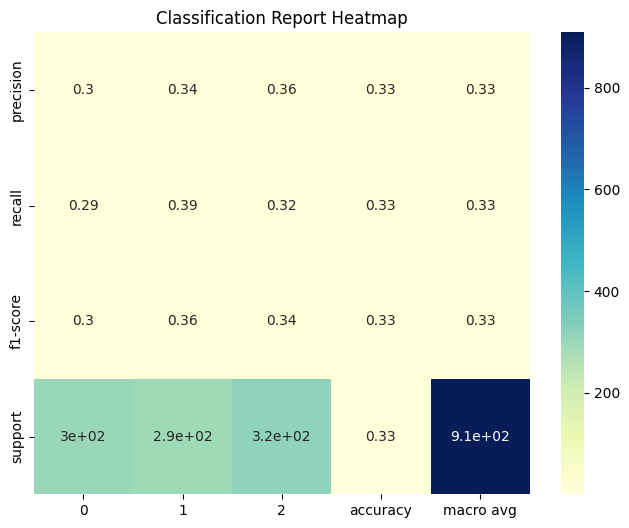

In [ ]:
# Get the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the dictionary to a DataFrame for visualization
report_df = pd.DataFrame(report_dict).transpose()

# Plot a heatmap of the classification report
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="YlGnBu")
plt.title('Classification Report Heatmap')
plt.show()

THANK YOU!